In [1]:
#Import packages
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
from rasterio.mask import mask
import os

#Import Earth Lab packages now
import earthpy as et 
import earthpy.spatial as es

#
plt.ion()

In [2]:
os.getcwd()
os.chdir(os.path.join(et.io.HOME, 'earth-analytics/'))
os.getcwd()

'/home/jovyan/earth-analytics'

In [3]:
et.data.get_data('spatial-vector-lidar')

'/home/jovyan/earth-analytics/data/spatial-vector-lidar/.'

In [4]:
## define pather to raster
sjer_dtm_path = 'data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDTM.tif'
sjer_dtm_path
# open raster
lidar_dtm = rio.open(sjer_dtm_path)
lidar_dtm

# view crs
lidar_dtm.crs
lidar_dtm.bounds

BoundingBox(left=254571.0, bottom=4107303.0, right=258867.0, top=4112362.0)

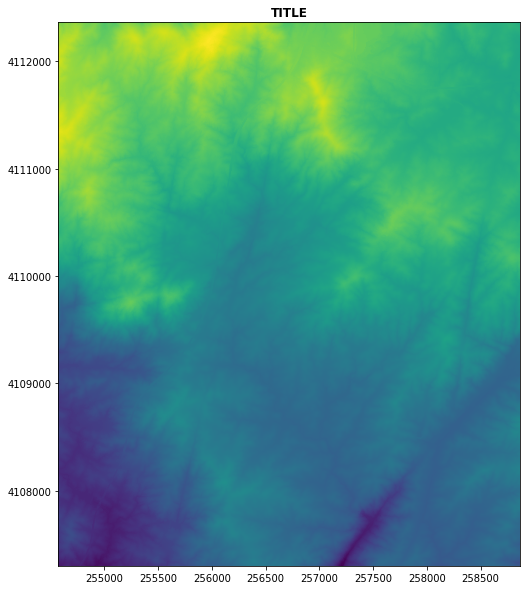

In [5]:
# plot raster
fig, ax = plt.subplots(figsize=(10,10))
show(lidar_dtm, ax=ax, title = 'TITLE')

In [6]:
# Close the connection to the file
lidar_dtm.close()
lidar_dtm

<closed DatasetReader name='data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDTM.tif' mode='r'>

In [7]:
# use context manager to open the file.  
# this means the file will be closed for us when we are done.
with rio.open(sjer_dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True) # take just the first band, handle null values.

#can see the file is closed after the with statement ends
src

<closed DatasetReader name='data/spatial-vector-lidar/california/neon-sjer-site/2013/lidar/SJER_lidarDTM.tif' mode='r'>

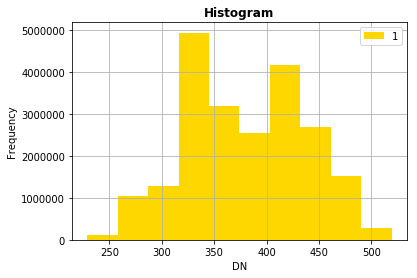

In [8]:
show_hist(lidar_dtm_im)